## The Three path Problem
Given two points A and B seperated by some fixed integer width w :

How many paths exist between A and B if you can only move RIGHT, UPRIGHT,and DOWNRIGHT
A and B exist on a lattice grid in $\mathbb{R}^2$

In [3]:
# library
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
"""
Pre: input number of iterations
Post: matrix consisting of rows generated by paths to each coordinate in the span of the movement across the latice

"""
def numWays(w):
    
    arr=np.zeros((w//2)*2+1)
    arr[(len(arr)//2)] = 1
    result=np.copy(arr)
    
    for i in range(w):
        newArr = np.copy(arr)
        for j in range(np.shape(arr)[0]):
            
            if np.abs(j - (w//2)) >= (w-i):
                newArr[j] = 0
                continue
            newArr[j] = arr[j]
            if j > 0:
                newArr[j] += arr[j-1]
            if j < len(newArr)-1:
                newArr[j] += arr[j+1]
        result=np.vstack([result,newArr])
        arr=np.copy(newArr)
    print( newArr[len(arr)//2])
    return  result

377379369.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,10.000000,66.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,9.000000,55.000000,275.000000,1221.000000,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,1.000000,8.000000,45.000000,210.000000,880.000000,3432.000000,12727.000000,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,1.000000,7.000000,36.000000,156.000000,615.000000,2277.000000,8074.000000,27742.000000,93093.000000,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,1.000000,6.000000,28.000000,112.000000,414.000000,1452.000000,4917.000000,16236.000000,52624.000000,168168.000000,531531.000000,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,1.000000,5.000000,21.000000,77.000000,266.000000,882.000000,2850.000000,9042.000000,28314.000000,87802.000000,270270.000000,827190.000000,2520336.000000,nan,nan,nan,nan
7,nan,nan,nan,1.000000,4.000000,15.000000,50.000000,161.000000,504.000000,1554.000000,4740.000000,14355.000000,43252.000000,129844.000000,388752.000000,1161615.000000,3465840.000000,10329336.000000,nan,nan,nan
8,nan,nan,1.000000,3.000000,10.000000,30.000000,90.000000,266.000000,784.000000,2304.000000,6765.000000,19855.000000,58278.000000,171106.000000,502593.000000,1477035.000000,4343160.000000,12778152.000000,37616427.000000,nan,nan
9,nan,1.000000,2.000000,6.000000,16.000000,45.000000,126.000000,357.000000,1016.000000,2907.000000,8350.000000,24068.000000,69576.000000,201643.000000,585690.000000,1704510.000000,4969152.000000,14508939.000000,42422022.000000,124191258.000000,nan


C:\Users\chris\AppData\Local\Temp\ipykernel_22292\2714469586.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


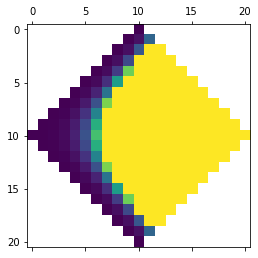

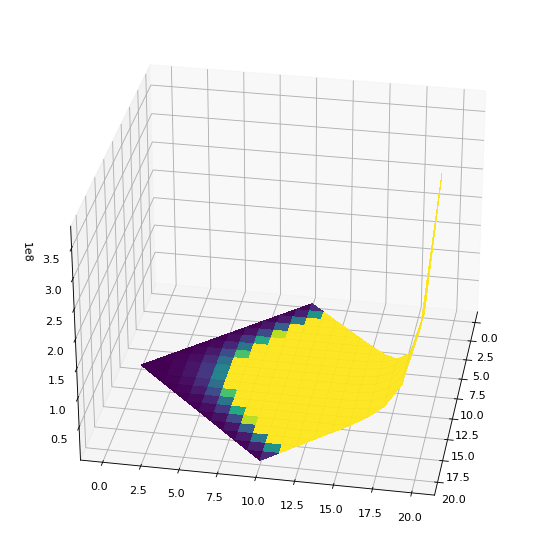

In [6]:
    
n=20
a=numWays(n)
a[a == 0.0] =float("NAN")

#custom coloring up to the maximum of the plot. 
plt.matshow(a.T, vmin=1, vmax=(np.floor(n/2)*n),interpolation = 'nearest')
val_xdim, val_ydim = a.shape
min_val, max_val = 0, np.shape(a)[0]

cm = sns.light_palette("red", as_cmap=True)
x=pd.DataFrame(a.T)
x=x.style.background_gradient(cmap="viridis",vmin=1, vmax=(np.floor(n/2)*n),)
display(x)

# generate meshgrid for plot
xax = np.arange(0, val_xdim)
yax = np.arange(0, val_ydim)
xax, yax = np.meshgrid(yax, xax)

# plot in R^3

fig=plt.figure(figsize=(9, 9), dpi=80)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xax, yax, a, rstride=1, cstride=1, cmap='viridis',vmin=1, vmax=(np.floor(n/2)*n), linewidth=0, antialiased=False)
ax.plot_wireframe(xax, yax, a, color='k', lw=0.05, alpha=0.3)
ax.view_init(30, 10)
 